### Mount Google Drive to persist checkpoints

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Install the package

In [2]:
! pip install git+https://github.com/divamgupta/image-segmentation-keras


  Cloning https://github.com/divamgupta/image-segmentation-keras to /tmp/pip-req-build-8xorxc28
  Running command git clone -q https://github.com/divamgupta/image-segmentation-keras /tmp/pip-req-build-8xorxc28
     |████████████████████████████████| 3.3MB 7.7MB/s 
     |████████████████████████████████| 952kB 52.2MB/s 
  Created wheel for keras-segmentation: filename=keras_segmentation-0.3.0-cp37-none-any.whl size=34545 sha256=ddf51416584246a02a54724e5d7602750dd9403ec637864d6cdb756af6fb2b97
  Stored in directory: /tmp/pip-ephem-wheel-cache-3nxyxkm9/wheels/a8/be/2c/1e1f0a75330e3ae33dd34c2ba085929eb7c7ae1d2184f4b7b5
Successfully built keras-segmentation
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.4.0 which is incompatible.
  Found existing installation: imageio 2.4.1
    Uninstalling imageio-2.4.1:
      Successfully uninstalled imageio-2.4.1
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully unins

### Download the dataset

In [3]:
# new dataset
!wget "https://queensuca-my.sharepoint.com/:u:/g/personal/16drp4_queensu_ca/redacted?download=1" -O /content/dataset.zip
!unzip "/content/dataset.zip" -d "/content/"
# !mv /content/dataset-mapillary-vistas-v2/ /content/dataset
!mv /content/dataset-mapillary-vistas-v3/ /content/dataset

Streaming output truncated to the last 5000 lines.
 extracting: /content/dataset-mapillary-vistas-v3/training/images/A8-CU4vnQPCAPLstFCkcoA.png  
  inflating: /content/dataset-mapillary-vistas-v3/training/images/a8QM9l3AJkQvTGbg57XZmw.png  
 extracting: /content/dataset-mapillary-vistas-v3/training/images/a8xUFTQTLJVYzvPoto-NTQ.png  
 extracting: /content/dataset-mapillary-vistas-v3/training/images/aAXgEUbtUDgFzDiaIBy3gw.png  
 extracting: /content/dataset-mapillary-vistas-v3/training/images/AayViGQnP34tZhlqif62Ow.png  
 extracting: /content/dataset-mapillary-vistas-v3/training/images/AB1eaR9h32xRyOop-l3zuA.png  
 extracting: /content/dataset-mapillary-vistas-v3/training/images/ADfGpdy7m6g6dgDJWHom1Q.png  
  inflating: /content/dataset-mapillary-vistas-v3/training/images/aEQC2qt5RDzFgEyxx6_Vzw.png  
  inflating: /content/dataset-mapillary-vistas-v3/training/images/aeX1J8TTqo2zubplWFkupQ.png  
 extracting: /content/dataset-mapillary-vistas-v3/training/images/Af-l0psNEEaI4MUDsRNgrg.png  

### Initialize the model

In [4]:
# https://github.com/divamgupta/image-segmentation-keras

from keras_segmentation.models.segnet import segnet

model = segnet(n_classes=50 ,  input_height=320, input_width=640  )


### Train the model

In [5]:
model.train(
    train_images =  "/content/dataset/training/images/",
    train_annotations = "/content/dataset/training/labels/",
    checkpoints_path = "/content/drive/MyDrive/Masters/models/segnet/model",
    epochs=5,
)

  1%|          | 11/1784 [00:00<00:17, 103.51it/s]

Verifying training dataset


100%|██████████| 1784/1784 [00:13<00:00, 128.77it/s]


Dataset verified! 
Epoch 1/5
512/512 [==============================] - 86s 107ms/step - loss: 1.3636 - accuracy: 0.8917

Epoch 00001: saving model to /content/drive/MyDrive/Masters/models/segnet/model.00001
Epoch 2/5
512/512 [==============================] - 55s 107ms/step - loss: 0.0148 - accuracy: 0.9964

Epoch 00002: saving model to /content/drive/MyDrive/Masters/models/segnet/model.00002
Epoch 3/5
512/512 [==============================] - 54s 106ms/step - loss: 0.0109 - accuracy: 0.9968

Epoch 00003: saving model to /content/drive/MyDrive/Masters/models/segnet/model.00003
Epoch 4/5
512/512 [==============================] - 54s 106ms/step - loss: 0.0080 - accuracy: 0.9975

Epoch 00004: saving model to /content/drive/MyDrive/Masters/models/segnet/model.00004
Epoch 5/5
512/512 [==============================] - 54s 106ms/step - loss: 0.0100 - accuracy: 0.9970

Epoch 00005: saving model to /content/drive/MyDrive/Masters/models/segnet/model.00005


### Sample model predictions

In [6]:
out = model.predict_segmentation(
    inp="/content/dataset/validation/images/-4jzRzGfKmQg8RBNlNqnGQ.png",
    out_fname="/content/out.png"
)

In [7]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

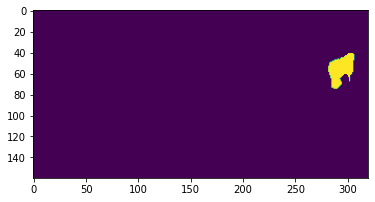

In [8]:
plt.imshow(out)

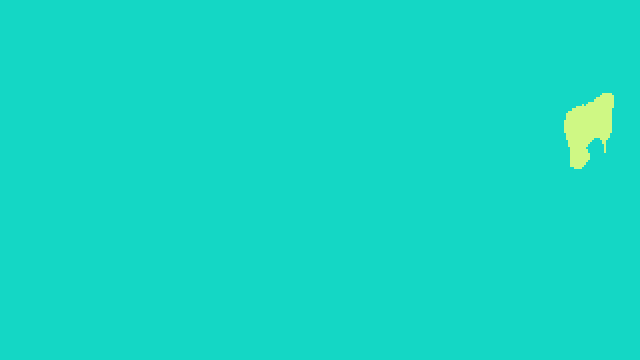

In [9]:
from IPython.display import Image
Image('/content/out.png')

In [10]:
o = model.predict_segmentation(
    inp="/content/dataset/validation/images/-4jzRzGfKmQg8RBNlNqnGQ.png",
    out_fname="/content/out.png" , overlay_img=True, show_legends=True,
    class_names = [ "Background", "Billboard"]
)

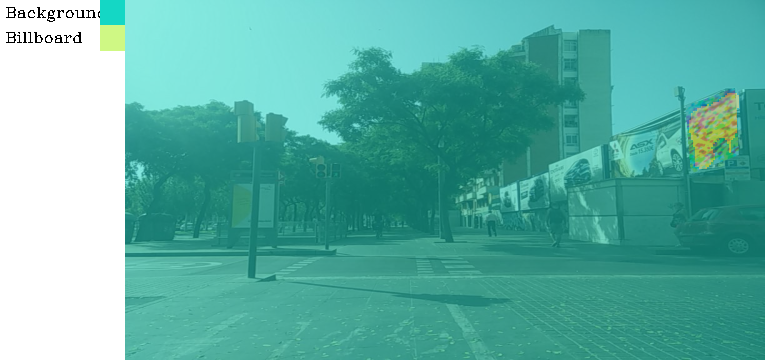

In [11]:
from IPython.display import Image
Image("/content/out.png")